## <font color='tag:blue'>Projeto 2 - Portfolio</font>

## <font color='tag:blue'>Análise Exploratória de Dados Para a Área de Varejo</font>

## Objetivos

Responder às perguntas de negócio solicitadas, formalizando o raciocínio utilizado para resolver os problemas.

## Condições

1. Dataset com pré-tratamento já realizado;
2. Dados gerais oriundos de um banco de dados público;
3. Considerando que o notebook será lido por um supervisor. 

In [1]:
# Versão
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.12


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import datetime as dt

## Carregamento dos Dados

In [3]:
df_dsa = pd.read_csv('dados/dataset.csv')

In [4]:
# Verificação do shape
df_dsa.shape

(9700, 11)

In [5]:
# Amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [6]:
# Amostra dos dados
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

Verificando a qualidade dos dados.

In [7]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [8]:
# Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

Geração do resumo estatístico da coluna com o valor de venda 'Valor_Venda' que é a variável de interesse. O resumo estatístico se aplica para variáveis numéricas, mas não para categóricas, e pode trazer indicadores importantes:

In [9]:
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

Na célula acima o segundo quartil (50%) equivale à MEDIANA.

Como a MEDIANA está bem diferente da média (MEAN), pode-se, de antemão já inferir que há outliers para cima nesse dataset. Esse(s) outlier(s) "empurram" a média para cima em comparação com a mediana.

Este método é um bom indicador prévio de outliers e um exemplo da importância da análise dos descritores logo no início da análise exploratória.


In [10]:
# Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [11]:
# Verificando de há valores ausentes (null)
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [12]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [13]:
# Conferindo quais as variáveis categóricas presentes no campo 'Categoria' e o número de ocorrências de cada uma:
df_dsa.Categoria.value_counts()

Office Supplies    5851
Furniture          2055
Technology         1794
Name: Categoria, dtype: int64

In [14]:
# Pode-se filtrar e ter um overview do volume vendido em cada "Categoria" de produto, dividido por 'Cidade':
df_dsa[["Categoria","Cidade","Valor_Venda"]].groupby(['Categoria', 'Cidade']).sum()

Valor_Venda
Categoria  Cidade                 
Furniture  Akron          433.5960
           Alexandria     267.4600
           Allen          244.0060
           Allentown       11.6480
           Amarillo      3048.5828
...                            ...
Technology Wichita        224.7500
           Wilmington    1786.3760
           Woodland       239.9840
           Yonkers       6140.2200
           Yuma           785.5130

[1185 rows x 1 columns]

In [15]:
# Pode-se aplicar o método sort e obter a resposta, dentro do filtro, dessa primeira questão de negócio:
df_dsa[["Categoria","Cidade","Valor_Venda"]].groupby(['Categoria', 'Cidade']).sum().sort_values\
    (by='Valor_Venda', ascending=False)

,,Valor_Venda
Categoria,Cidade,
Technology,New York City,108890.166
Furniture,New York City,74496.239
Technology,Los Angeles,72109.912
Office Supplies,New York City,68362.814
Furniture,Los Angeles,52446.621
...,...,...
Office Supplies,Jupiter,2.064
Technology,Sheboygan,1.980
Office Supplies,Elyria,1.824


> Ou seja, a resposta desta primeira pergunta de negócio é <b>New York City</b>, com o Valor_Venda de <b>68362.814</b>.

Como o objetivo é indicar a cidade com o maior 'Valor_Venda' da 'Categoria' 'Office Supplies', pode-se coletar esse resultado salvar em uma variável.

Pode-se portante obter esta resposta de uma forma mais versátil e limpa, e que seja posteriormente reutilizada, por exemplo.

In [16]:
df_agrupado = df_dsa[df_dsa['Categoria'] == 'Office Supplies']
df_agrupado.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.620
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.368
6,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AR-10002833,Office Supplies,Art,7.280
8,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-BI-10003910,Office Supplies,Binders,18.504
9,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AP-10002892,Office Supplies,Appliances,114.900


In [17]:
# Agrupam-se os resultados por cidade, somando a coluna 'Valor_Venda' de cada 'Cidade'.
# Retorna como um dataframe para permitir uma melhor manipulação.
df_vendas = df_agrupado.groupby('Cidade')['Valor_Venda'].sum().to_frame()

In [18]:
# Ordena-se um filtro a partir do maior valor...
df_vendas = df_vendas.sort_values(by='Valor_Venda', ascending=False).reset_index()
df_vendas

,Cidade,Valor_Venda
0,New York City,68362.814
1,Los Angeles,47098.100
2,San Francisco,41771.198
3,Seattle,34856.878
4,Philadelphia,29313.687
...,...,...
475,Ormond Beach,2.808
476,Pensacola,2.214
477,Jupiter,2.064
478,Elyria,1.824


In [19]:
# E isola-se somente o primeiro registro (a linha de interesse):
df_vendas.sort_values(by='Valor_Venda', ascending=False).head(1)

,Cidade,Valor_Venda
0,New York City,68362.814


In [20]:
# Pode-se portanto, salvar como um JSON (ou outro formato adequado) para aplicação/utilização futura.
top_cidade = df_vendas.sort_values(by='Valor_Venda', ascending=False).head(1).to_json(orient='records')
print(top_cidade)

[{"Cidade":"New York City","Valor_Venda":68362.814}]


## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido? (Demonstrando o resultado através de um gráfico de barras)

In [21]:
# Para permitir a manipulação correta das datas, é necessário ajustar o tipo dos dados na coluna 'Data_Pedido'.
df_dsa['Data_Pedido'] = pd.to_datetime(df_dsa['Data_Pedido'], format='%d/%m/%Y')

In [22]:
# Cria-se uma pd.Series com o "Valor_Venda" por data, transformando em DataFrame para facilitar a manipulação.
df_data = df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum().to_frame()
df_data.sort_values(by='Data_Pedido')

,Valor_Venda
Data_Pedido,
2015-01-03,16.4480
2015-01-04,288.0600
2015-01-05,19.5360
2015-01-06,4407.1000
2015-01-07,87.1580
...,...
2018-12-26,814.5940
2018-12-27,177.6360
2018-12-28,1657.3508


Se fosse plotado um único gráfico simples a partir dessa Series, ele ficaria muito poluido devido à alta granularidade dos dados, conforme exemplo abaixo:

<Axes: xlabel='Data_Pedido'>

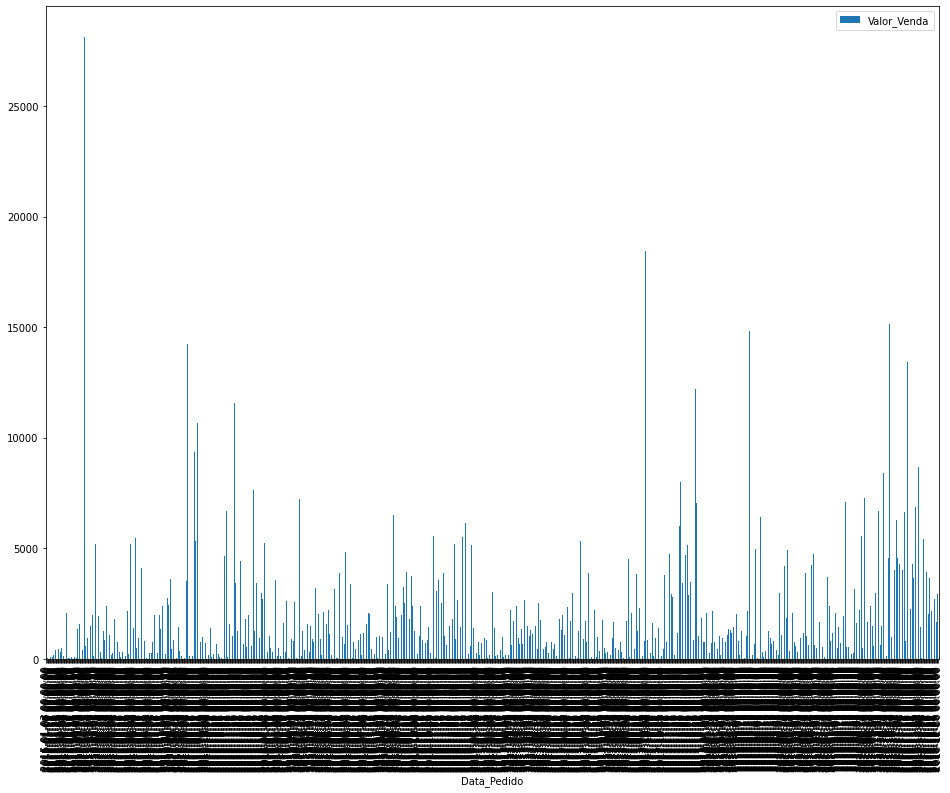

In [23]:
df_data.plot.bar(figsize=(16,12))

Como a série história compreende 4 anos de dados, com granularidade diária, tem-se algumas alternativas mais vantajosas:

> Classificar os dados por períodos maiores, de forma a permitir uma visualização mais adequada. Pode-se agrupar (acumular) os dados por ano, por semestre, ou por mês, por exemplo, gerando um único gráfico com todos os valores.

> Pode-se ainda gerar um gráfico para cada mês da série histórica, compreendendo assim o 'Valor_Venda' para cada data individualmente.

In [24]:
# Criando um DataFrame com os resultados anuais de vendas:
df_year = df_data.resample('Y').sum()
df_year

,Valor_Venda
Data_Pedido,
2015-12-31,470768.6001
2016-12-31,454072.5154
2017-12-31,595365.9240
2018-12-31,715350.9152


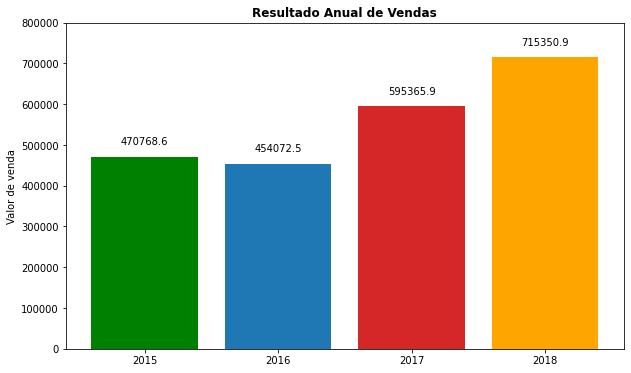

In [25]:
# Plotando um gráfico com o acumulado anual de vendas:

fig, ax = plt.subplots(figsize=(10,6))

years = ["2015", "2016", "2017", "2018"]
sells = df_year['Valor_Venda']
bar_colors = ['green', 'tab:blue', 'tab:red', 'orange']

bars = ax.bar(years, sells, color=bar_colors)

# Adicionando rótulo das barras:
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 10),  # offset do texto sobre a barra
                textcoords="offset points", ha='center', va='bottom')


ax.set_ylabel('Valor de venda')
ax.set_title('Resultado Anual de Vendas', fontweight='bold')
ax.set_ylim(0, 800000)

plt.show()

In [26]:
# Pode-se fazer representar os dados em outra frequência, criando o Dataframe com os dados trimestrais, p. exemplo
df_quarter = df_data.resample('Q').sum()
df_quarter

,Valor_Venda
Data_Pedido,
2015-03-31,73370.8460
2015-06-30,84977.1536
2015-09-30,137630.7423
2015-12-31,174789.8582
2016-03-31,62075.3710
2016-06-30,87049.3230
2016-09-30,128560.2072
2016-12-31,176387.6142
2017-03-31,92109.7690


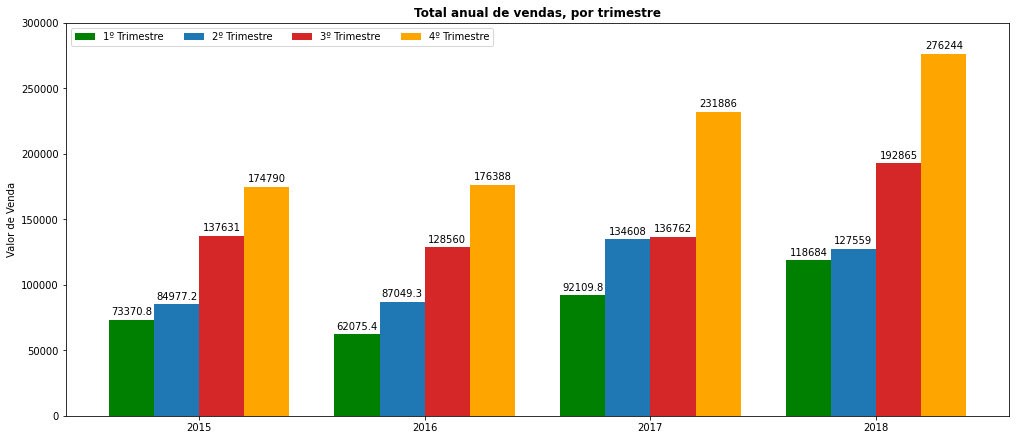

In [27]:
# Plotando gráfico de barras com o volume de vendas por trimestre, agrupados anualmente:
years = ("2015", "2016", "2017", "2018")
trimestrais = {
    '1º Trimestre': (df_quarter['Valor_Venda'][0:16:4]),
    '2º Trimestre': (df_quarter['Valor_Venda'][1:16:4]),
    '3º Trimestre': (df_quarter['Valor_Venda'][2:16:4]),
    '4º Trimestre': (df_quarter['Valor_Venda'][3:16:4]),
}

# Ajuste das barras
x = np.arange(len(years))  # Posição dos rótulos
width = 0.2  # Espessura das barras
multiplier = 0

# Ajuste do layout
fig, ax = plt.subplots(layout='constrained', figsize=(14,6))

for attribute, measurement in trimestrais.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=bar_colors[multiplier])
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Ajuste dos eixos
ax.set_ylabel('Valor de Venda')
ax.set_title('Total anual de vendas, por trimestre', fontweight='bold')
ax.set_xticks(x + (width*1.5), years) # Alinhamento
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 300000)

plt.show()

Pode-se plotar ainda as vendas trimestrais com linhas, comparando cada período a seu correspondente, por ano, enfatizando ainda que as vendas aumentam com o decorrer do ano, com o maior volume de venda nos trimestres finais.

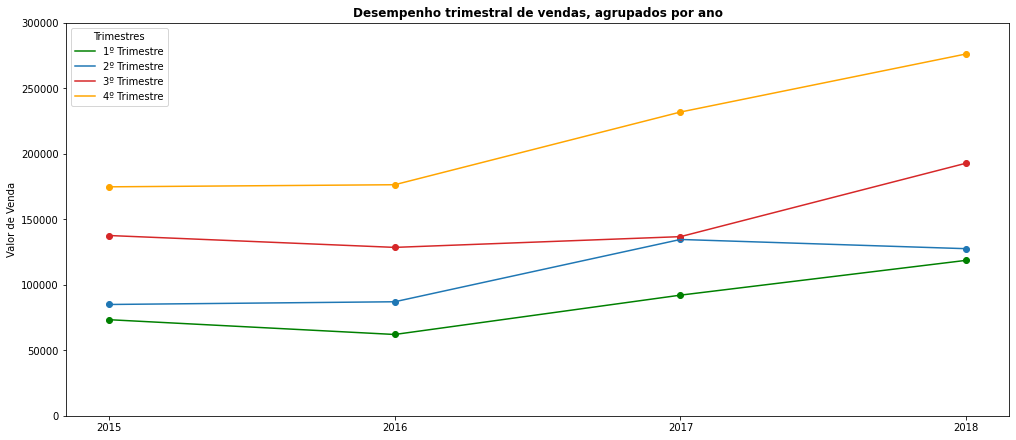

In [28]:
x = np.arange(len(years))  # Identificação dos Rótulos (Eixo X)
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(14, 6))

for attribute, measurement in trimestrais.items():
    ax.plot(x, measurement, label=attribute, color=bar_colors[multiplier])
    ax.scatter(x, measurement, color=bar_colors[multiplier])
    multiplier += 1

# Ajuste dos eixos e legenda
ax.set_ylabel('Valor de Venda')
ax.set_title('Desempenho trimestral de vendas, agrupados por ano', fontweight='bold')
ax.set_xticks(x, years)
ax.legend(loc='upper left', title="Trimestres")
ax.set_ylim(0, 300000)

plt.show()

O gráfico a seguir, além de trazer o mesmo resultado, ainda torna mais claro o desempenho anual das vendas e flutuação do valor durante cada ano.

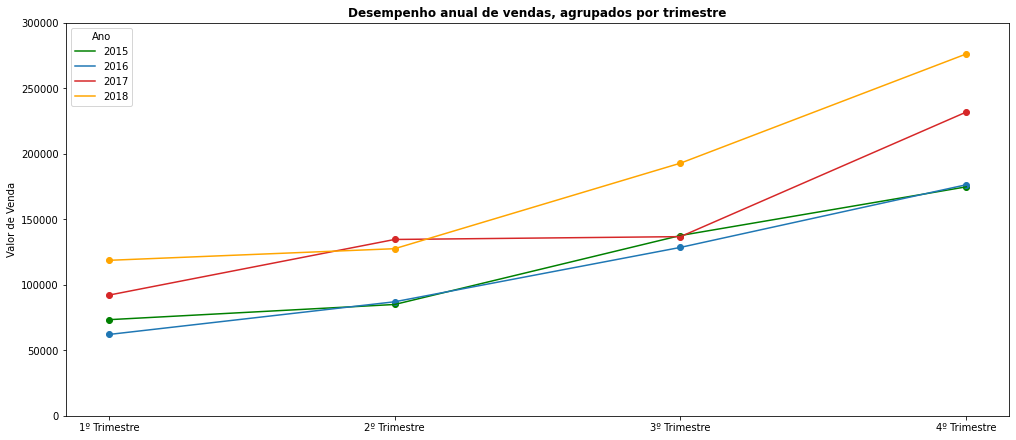

In [29]:
x = np.arange(len(trimestrais))  # Identificação dos Rótulos (Eixo X)
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(14, 6))

for i, year in enumerate(years):
    measurement = [trimestrais[key][i] for key in trimestrais.keys()]
    ax.plot(x, measurement, label=year, color=bar_colors[multiplier])
    ax.scatter(x, measurement, color=bar_colors[multiplier])
    multiplier += 1
    
# Ajuste dos eixos e legenda
ax.set_ylabel('Valor de Venda')
ax.set_title('Desempenho anual de vendas, agrupados por trimestre', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(trimestrais.keys())
ax.legend(loc='upper left', title='Ano')
ax.set_ylim(0, 300000)

plt.show()

In [30]:
# Pode-se ainda agrupar o Valor de Venda por Mês:
df_monthly = df_data.resample('M').sum()
df_monthly

,Valor_Venda
Data_Pedido,
2015-01-31,14205.7070
2015-02-28,3959.3420
2015-03-31,55205.7970
2015-04-30,27336.6230
2015-05-31,23457.3950
2015-06-30,34183.1356
2015-07-31,31124.8270
2015-08-31,25700.1865
2015-09-30,80805.7288


Text(0.5, 1.0, 'Vendas Mensais - 2018')

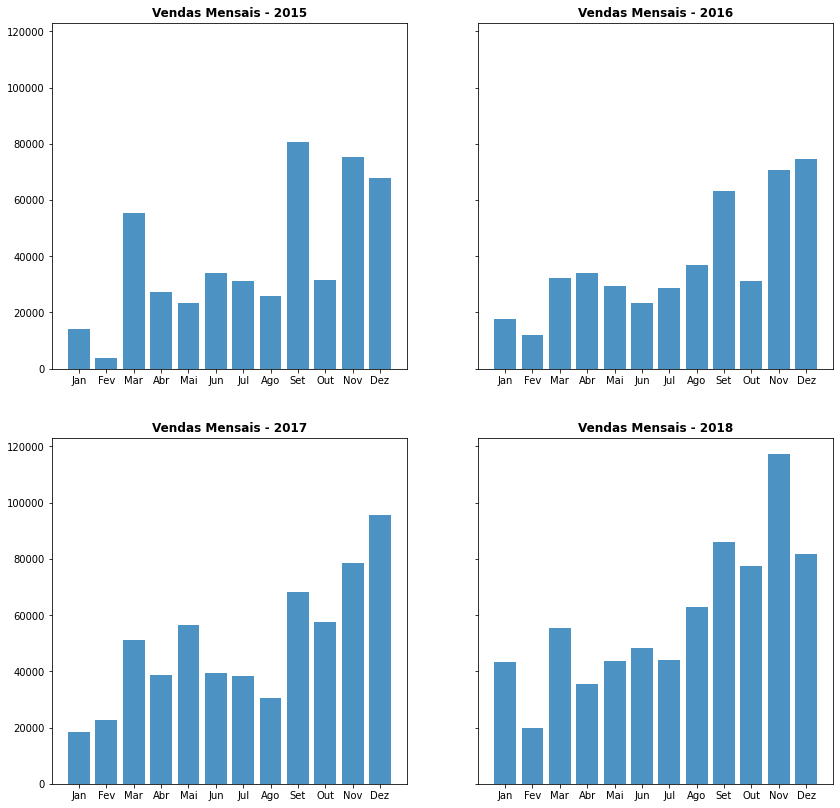

In [31]:
# Plotando o resultado mensal de vendas, agrupando em subplots minimalistas, um para cada ano.
# Adota-se esta estratégia devido ao maior volume de dados.
months = np.array(["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"])
dict_sells_per_year = {
    '2015': (df_monthly['Valor_Venda'][0:12]),
    '2016': (df_monthly['Valor_Venda'][12:24]),
    '2017': (df_monthly['Valor_Venda'][24:36]),
    '2018': (df_monthly['Valor_Venda'][36:48]),
}
sells_per_year = np.array(list(dict_sells_per_year.values()))

fig, axes = plt.subplots(2, 2, figsize = (14, 14), sharey=True)

axes[0,0].bar(months, sells_per_year[0], align="center", width=0.8, alpha=0.8, color='tab:blue')
axes[0,0].set_title("Vendas Mensais - 2015", fontweight='bold')

axes[0,1].bar(months, sells_per_year[1], align="center", width=0.8, alpha=0.8, color='tab:blue')
axes[0,1].set_title("Vendas Mensais - 2016", fontweight='bold')

axes[1,0].bar(months, sells_per_year[2], align="center", width=0.8, alpha=0.8, color='tab:blue')
axes[1,0].set_title("Vendas Mensais - 2017", fontweight='bold')

axes[1,1].bar(months, sells_per_year[3], align="center", width=0.8, alpha=0.8, color='tab:blue')
axes[1,1].set_title("Vendas Mensais - 2018", fontweight='bold')

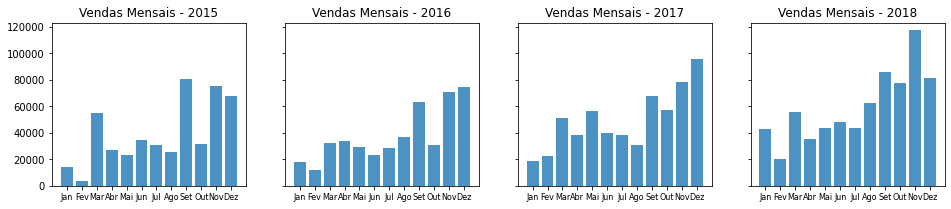

In [32]:
# Plotando em linha e em uma escala que permite uma melhor comparação visual entre cada ano:

fig, axes = plt.subplots(1, 4, figsize = (16, 3), sharey=True) # Fixado o eixo Y

axes[0].bar(months, sells_per_year[0], align="center", width=0.8, alpha=0.8, color='tab:blue')
axes[0].set_title("Vendas Mensais - 2015")
axes[0].tick_params(axis='x', labelsize=8) 

axes[1].bar(months, sells_per_year[1], align="center", width=0.8, alpha=0.8, color='tab:blue')
axes[1].set_title("Vendas Mensais - 2016")
axes[1].tick_params(axis='x', labelsize=8)

axes[2].bar(months, sells_per_year[2], align="center", width=0.8, alpha=0.8, color='tab:blue')
axes[2].set_title("Vendas Mensais - 2017")
axes[2].tick_params(axis='x', labelsize=8)

axes[3].bar(months, sells_per_year[3], align="center", width=0.8, alpha=0.8, color='tab:blue')
axes[3].set_title("Vendas Mensais - 2018")
axes[3].tick_params(axis='x', labelsize=8)

Pode-se usar uma plotagem semelhante para demonstrar o resultado semanal, dividido por mês.
Da mesma forma, devido ao volume de dados, prioriza-se uma representação mais minimalista.
Para isso, faz-se um swap e agrupa-se os dados semanalmente em uma nova variável.

In [33]:
# Agrupa-se o "Valor_Venda" por semana e cria-se um index para facilitar a manipulação.
df_weekly = df_data.resample('W').sum()
df_weekly = df_weekly.reset_index()
df_weekly

,Data_Pedido,Valor_Venda
0,2015-01-04,304.5080
1,2015-01-11,4619.1080
2,2015-01-18,4130.5330
3,2015-01-25,3092.5440
4,2015-02-01,2527.9140
...,...,...
204,2018-12-02,34665.0800
205,2018-12-09,21432.3010
206,2018-12-16,11542.8340
207,2018-12-23,19457.0680


In [34]:
# Cria-se a coluna 'Mes' para servir de referência no agrupamento semanal dos valores.
df_weekly['Mes'] = df_weekly['Data_Pedido'].dt.strftime('%Y-%m')
df_weekly['Mes'] = pd.to_datetime(df_weekly['Mes'], format='%Y-%m')
df_weekly

,Data_Pedido,Valor_Venda,Mes
0,2015-01-04,304.5080,2015-01-01
1,2015-01-11,4619.1080,2015-01-01
2,2015-01-18,4130.5330,2015-01-01
3,2015-01-25,3092.5440,2015-01-01
4,2015-02-01,2527.9140,2015-02-01
...,...,...,...
204,2018-12-02,34665.0800,2018-12-01
205,2018-12-09,21432.3010,2018-12-01
206,2018-12-16,11542.8340,2018-12-01
207,2018-12-23,19457.0680,2018-12-01


In [35]:
# Como são 48 meses no total (verificável no df_monthly ou na linha abaixo), serão 48 gráficos no total:
df_weekly.Mes.value_counts().count()

48

In [36]:
# Checando o formato dos dados
df_weekly.dtypes

Data_Pedido    datetime64[ns]
Valor_Venda           float64
Mes            datetime64[ns]
dtype: object

In [37]:
# Criando a coluna 'Semana', para contabilizar e indexar a quantidade de semanas em cada ano.
df_weekly['Semana'] = df_weekly['Data_Pedido'].dt.isocalendar().week
df_weekly

,Data_Pedido,Valor_Venda,Mes,Semana
0,2015-01-04,304.5080,2015-01-01,1
1,2015-01-11,4619.1080,2015-01-01,2
2,2015-01-18,4130.5330,2015-01-01,3
3,2015-01-25,3092.5440,2015-01-01,4
4,2015-02-01,2527.9140,2015-02-01,5
...,...,...,...,...
204,2018-12-02,34665.0800,2018-12-01,48
205,2018-12-09,21432.3010,2018-12-01,49
206,2018-12-16,11542.8340,2018-12-01,50
207,2018-12-23,19457.0680,2018-12-01,51


Next

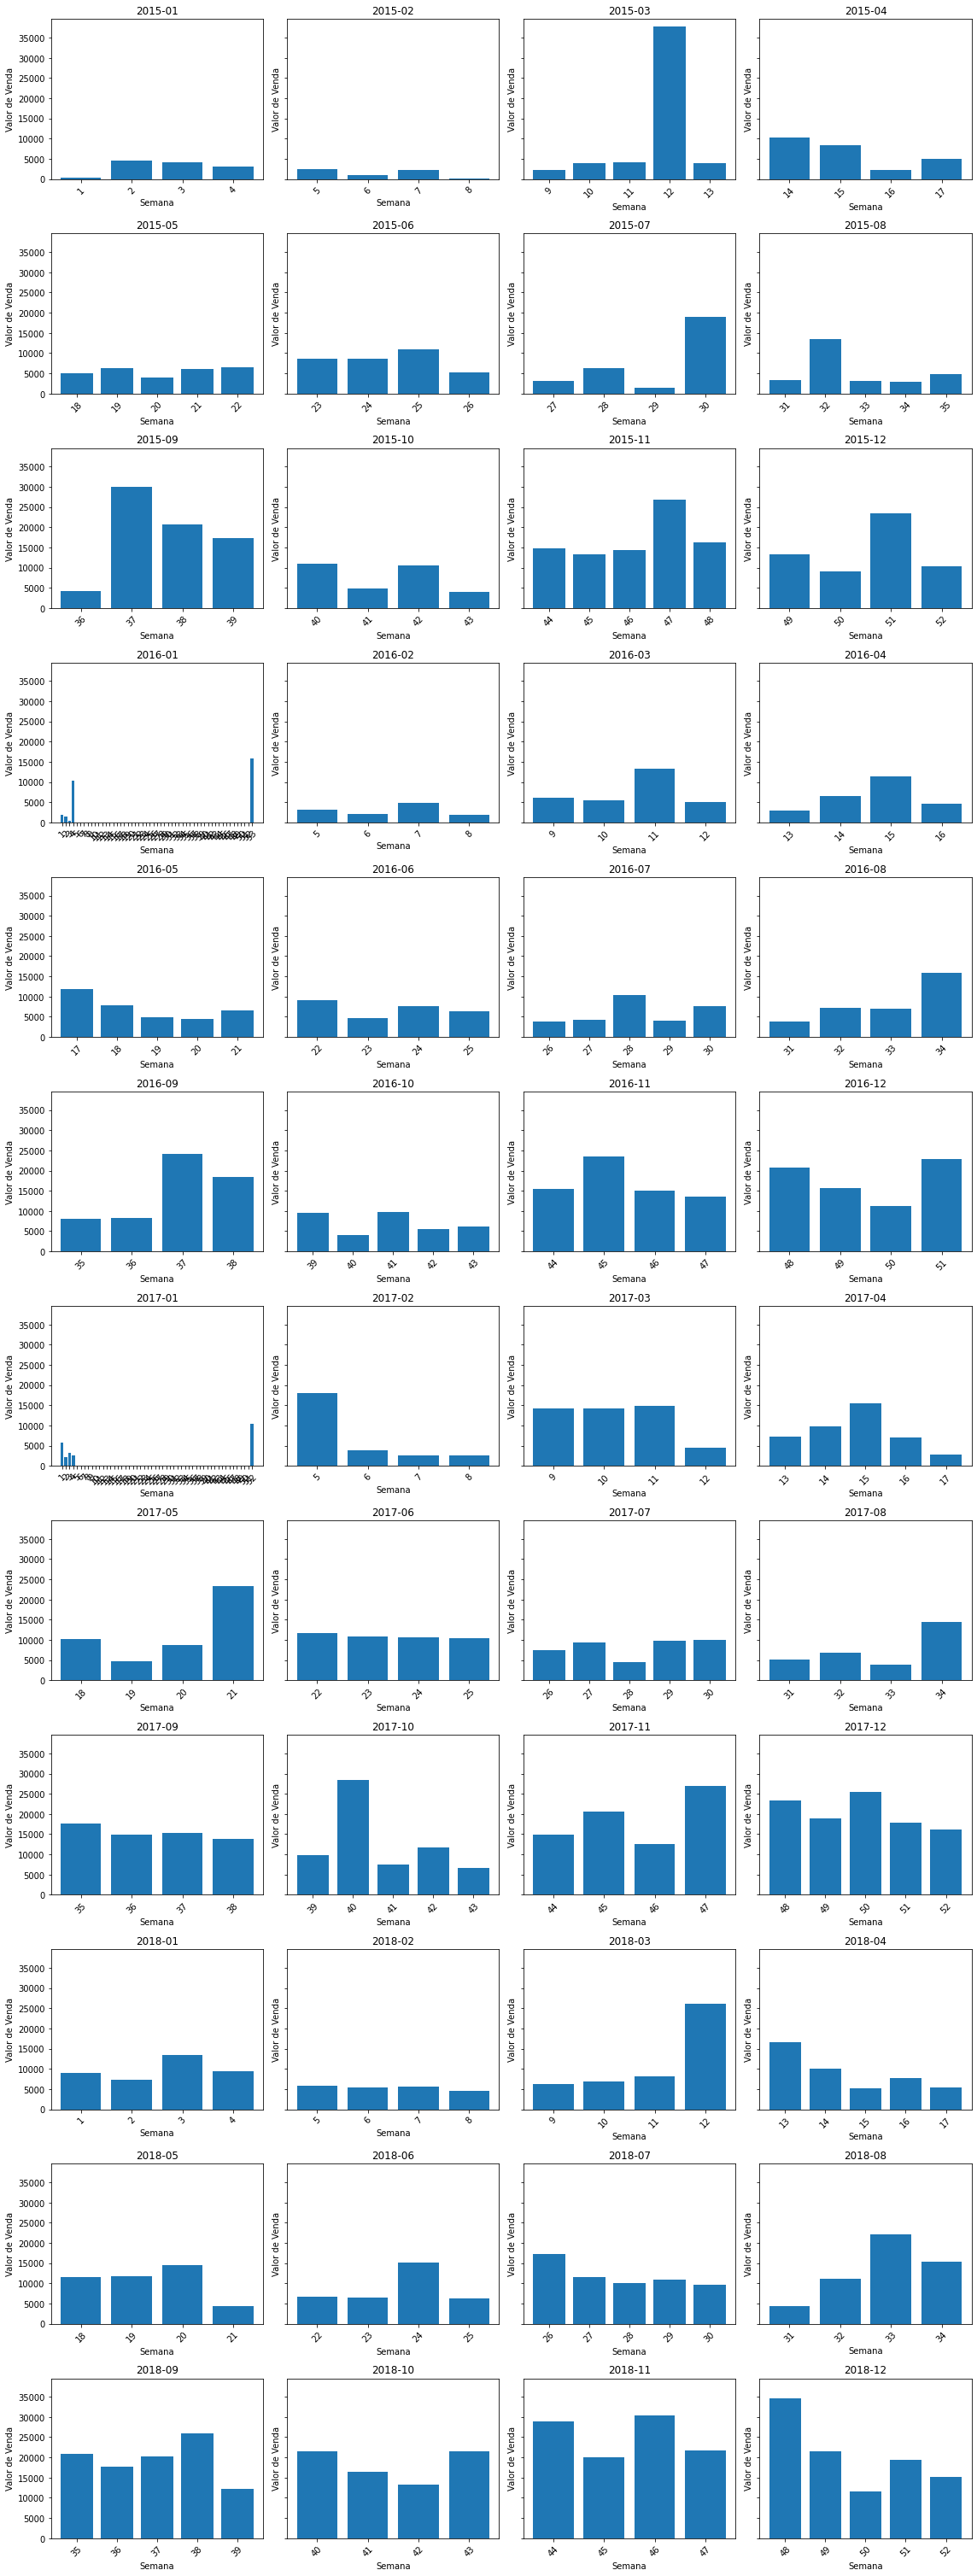

In [38]:
# Plotagem de 'multigráficos' mensais, a partir dos dados semanais agrupados

fig, axs = plt.subplots(12, 4, figsize=(16, 42), sharey=True) # Fixando o eixo Y para permitir a comparação

for i, mes in enumerate(df_weekly['Mes'].unique()):
    linha = i // 4  # Número da linha do subplot
    coluna = i % 4  # Número da coluna do subplot
    
    mes_df = df_weekly[df_weekly['Mes'] == mes]
    semana_min = mes_df['Semana'].min()
    semana_max = mes_df['Semana'].max()
    
    semanas = list(range(semana_min, semana_max + 1))
    vendas = mes_df.groupby('Semana')['Valor_Venda'].sum().reindex(semanas, fill_value=0)
    
    axs[linha, coluna].bar(semanas, vendas)
    axs[linha, coluna].set_title(np.datetime_as_string(mes, unit='M'))
    axs[linha, coluna].set_xlabel('Semana')
    axs[linha, coluna].set_ylabel('Valor de Venda')
    axs[linha, coluna].set_xticks(semanas)
    axs[linha, coluna].tick_params(axis='x', rotation=45)
    
# Ajuste do layout
plt.tight_layout()
plt.show()

O plot acima retornou erros em alguns dos subplots: axis (3,0) e axis (6,0).
Para identificar a origem e reparar os erros, pode-se fazer uma varredura no dataframe:

In [39]:
# Checando inconsistências nos dados do dataframe relacionados aos subplots axis (3,0) e axis (6,0):
df_weekly.iloc[[0, 51, 52, 53, 103, 104, 105, 156, 157]]

,Data_Pedido,Valor_Venda,Mes,Semana
0,2015-01-04,304.5080,2015-01-01,1
51,2015-12-27,10335.8080,2015-12-01,52
52,2016-01-03,15880.6606,2016-01-01,53
53,2016-01-10,1973.4440,2016-01-01,1
103,2016-12-25,22843.0470,2016-12-01,51
104,2017-01-01,10421.8172,2017-01-01,52
105,2017-01-08,5769.6080,2017-01-01,1
156,2017-12-31,16060.1850,2017-12-01,52
157,2018-01-07,9060.9840,2018-01-01,1


É possível identificar um erro no campo semana, com a primeira semana do ano de 2016 sendo contabilizada como a 53ª semana de 2015.

Este não é propriamente um erro, mas é um comportamento já esperado relacionado ao sistema ISO, utilizado para a criação dessa feature.

Para reparação do problema, ao invés do método 'dt.isocalendar' pode-se utilizar o método 'dt.strftime', com o argumento '%U' ao invés do '%W' (que indexa (inicia) as semanas com a base 0).

In [40]:
df_weekly['Semana'] = df_weekly['Data_Pedido'].dt.strftime('%U').astype(int) # Usa-se o %U ao invés do %W
df_weekly

,Data_Pedido,Valor_Venda,Mes,Semana
0,2015-01-04,304.5080,2015-01-01,1
1,2015-01-11,4619.1080,2015-01-01,2
2,2015-01-18,4130.5330,2015-01-01,3
3,2015-01-25,3092.5440,2015-01-01,4
4,2015-02-01,2527.9140,2015-02-01,5
...,...,...,...,...
204,2018-12-02,34665.0800,2018-12-01,48
205,2018-12-09,21432.3010,2018-12-01,49
206,2018-12-16,11542.8340,2018-12-01,50
207,2018-12-23,19457.0680,2018-12-01,51


In [41]:
# Pode-se fazer novamente a checagem se algumas das linhas estão com o número da semana correto:
df_weekly.iloc[[0, 51, 52, 53, 103, 104, 105, 156, 157]]

,Data_Pedido,Valor_Venda,Mes,Semana
0,2015-01-04,304.5080,2015-01-01,1
51,2015-12-27,10335.8080,2015-12-01,52
52,2016-01-03,15880.6606,2016-01-01,1
53,2016-01-10,1973.4440,2016-01-01,2
103,2016-12-25,22843.0470,2016-12-01,52
104,2017-01-01,10421.8172,2017-01-01,1
105,2017-01-08,5769.6080,2017-01-01,2
156,2017-12-31,16060.1850,2017-12-01,53
157,2018-01-07,9060.9840,2018-01-01,1


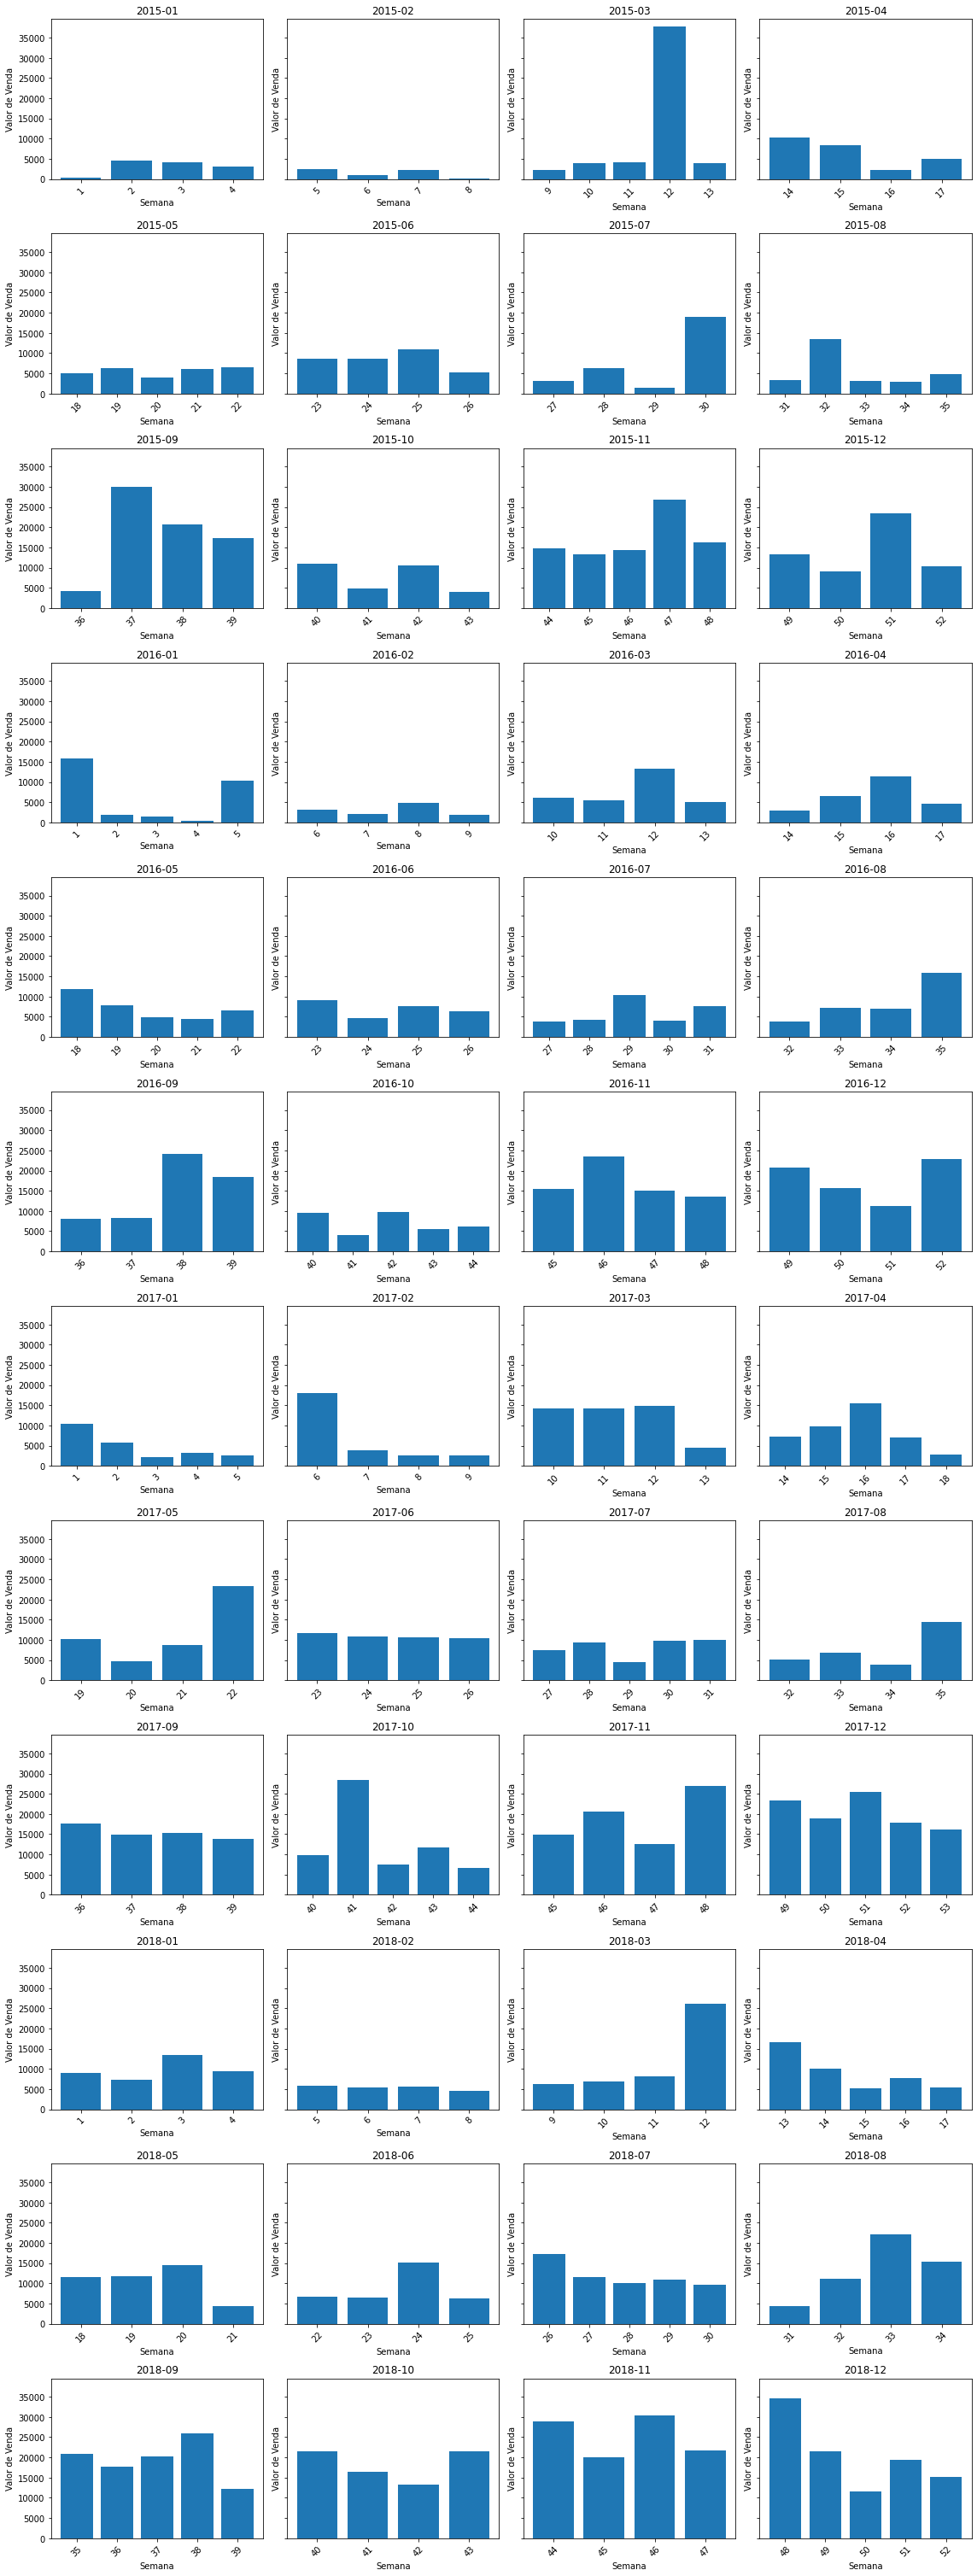

In [42]:
# Plotando novamente, confirma-se que o erro está corrigido.

fig, axs = plt.subplots(12, 4, figsize=(16, 42), sharey=True)

for i, mes in enumerate(df_weekly['Mes'].unique()):
    linha = i // 4  # Número da linha do subplot
    coluna = i % 4  # Número da coluna do subplot
    
    mes_df = df_weekly[df_weekly['Mes'] == mes]
    semana_min = mes_df['Semana'].min()
    semana_max = mes_df['Semana'].max()
    
    semanas = list(range(semana_min, semana_max + 1))
    vendas = mes_df.groupby('Semana')['Valor_Venda'].sum().reindex(semanas, fill_value=0)
    
    axs[linha, coluna].bar(semanas, vendas)
    axs[linha, coluna].set_title(np.datetime_as_string(mes, unit='M'))
    axs[linha, coluna].set_xlabel('Semana')
    axs[linha, coluna].set_ylabel('Valor de Venda')
    axs[linha, coluna].set_xticks(semanas)
    axs[linha, coluna].tick_params(axis='x', rotation=45)
    
# Ajuste do layout
plt.tight_layout()
plt.show()

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado? (Demonstrar o resultado através de um gráfico de barras.)

In [43]:
# Cria-se o DataFrame com os dados necessários e já ordenados para permitir que o gráfico foque na variável-alvo.
df_estado = df_dsa.groupby('Estado')['Valor_Venda'].sum().sort_values(ascending=False).to_frame()
df_estado

,Valor_Venda
Estado,
California,442927.0975
New York,304536.4010
Texas,163549.8602
Washington,133826.0060
Pennsylvania,114411.6800
Florida,88043.7000
Illinois,78109.9270
Michigan,76081.1740
Ohio,74277.8020


<Axes: xlabel='Estado'>

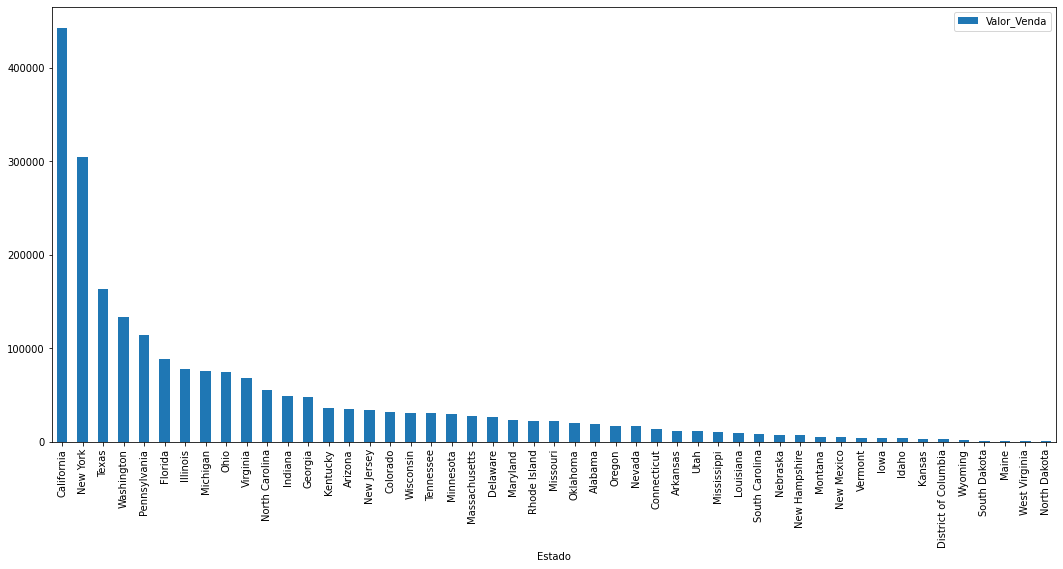

In [44]:
# Como são muitas barras, é mais vantajogo não poluir este plot com muitos elementos visuais.
df_estado.plot.bar(figsize=(18,8))

Poderiam ainda ser criados plots mais detalhados, dividindo o Valor de Venda dos Estados por classe, ou priorizando apenas Estados mais relevantes, por exemplo:

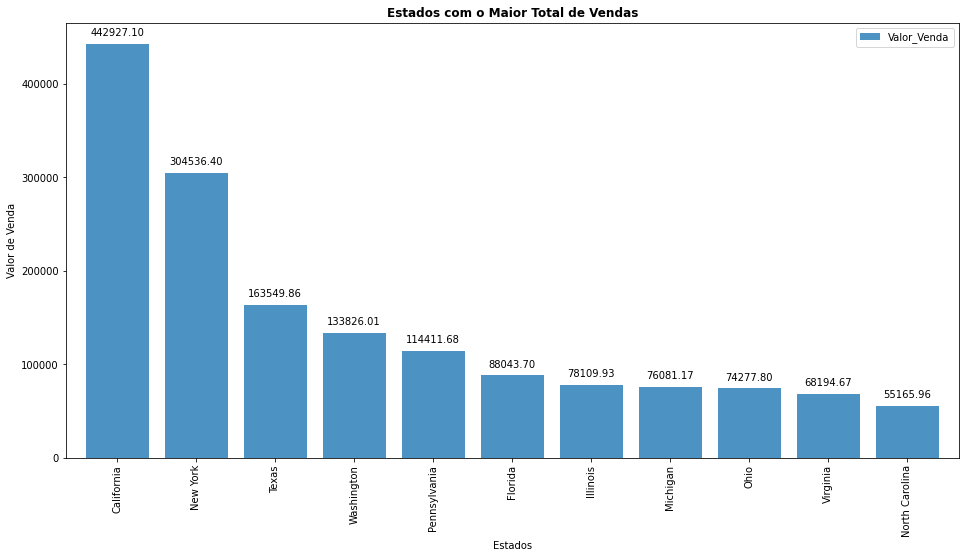

In [45]:
# Utiliza-se o mesmo DataFrame criado anteriormente para plotar um gráfico em maior nível de detalhe.
fig, ax = plt.subplots(figsize=(16, 8))
df_estado[0:11].plot.bar(ax=ax, width=0.8, alpha=0.8, color="tab:blue")

ax.set_xlabel('Estados')
ax.set_ylabel('Valor de Venda')
ax.set_title('Estados com o Maior Total de Vendas', fontweight='bold')

for p in ax.patches:
    bar_label = '{:.2f}'.format(round(p.get_height(),2))
    ax.annotate(str(bar_label), (p.get_x() + p.get_width() / 2, p.get_height()),\
                xytext=(0, 6), textcoords="offset points",\
                ha='center', va='bottom')
    
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas? (Demonstrar o resultado através de um gráfico de barras.)

In [46]:
# Cria-se um filtro no DataFrame com os dados necessários, já ordenando por Valor de Venda (Valor_Venda):
df_cidade = df_dsa.groupby('Cidade')['Valor_Venda'].sum().sort_values(ascending=False).to_frame()
df_cidade

,Valor_Venda
Cidade,
New York City,251749.219
Los Angeles,171654.633
Seattle,114725.478
San Francisco,107489.952
Philadelphia,107197.803
...,...
Ormond Beach,2.808
Pensacola,2.214
Jupiter,2.064


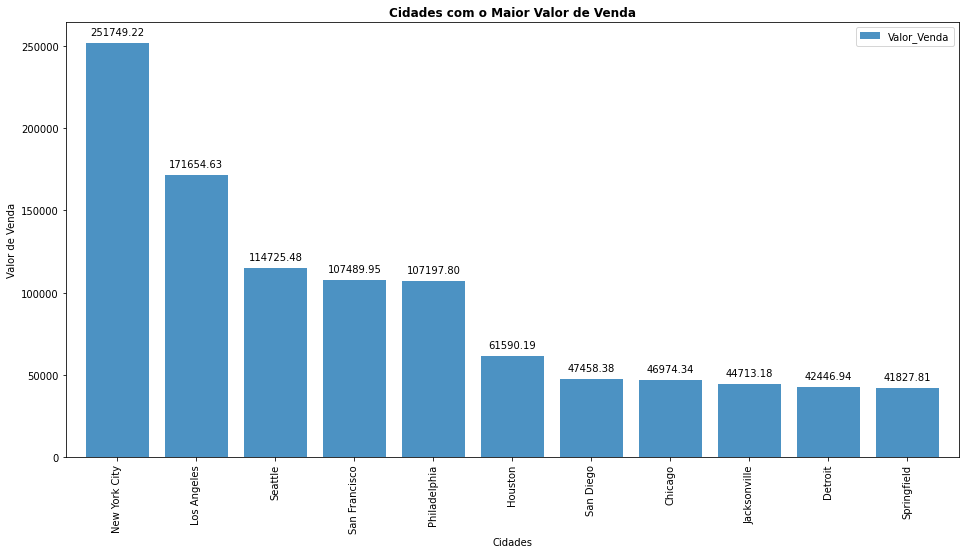

In [47]:
# Utiliza-se o mesmo DataFrame criado anteriormente para plotar um gráfico em maior nível de detalhe.
fig, ax = plt.subplots(figsize=(16, 8))
df_cidade[0:11].plot.bar(ax=ax, width=0.8, alpha=0.8, color='tab:blue')

ax.set_xlabel('Cidades')
ax.set_ylabel('Valor de Venda')
ax.set_title('Cidades com o Maior Valor de Venda', fontweight='bold')

for p in ax.patches:
    bar_label = '{:.2f}'.format(round(p.get_height(),2))
    ax.annotate(str(bar_label), (p.get_x() + p.get_width() / 2, p.get_height()), \
                xytext=(0, 6), textcoords="offset points",\
                ha='center', va='bottom')
    
plt.show()

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas? (Demonstrar o resultado através de um gráfico de pizza.)

In [48]:
# Filtrando o DataFrame com as variáveis de interesse
df_segmento = df_dsa.groupby('Segmento')['Valor_Venda'].sum().sort_values(ascending=False).to_frame()
df_segmento

,Valor_Venda
Segmento,
Consumer,1.133834e+06
Corporate,6.792322e+05
Home Office,4.224914e+05


O Pie Plot, apesar de não muito recomendado, funciona melhor com percentuais. 
Portanto, pode-se criar um campo com o percentual e plotar o gráfico a partir disso.

In [49]:
df_segmento['Percentual'] = df_segmento['Valor_Venda'].apply(lambda x: (x / df_segmento['Valor_Venda'].sum()) * 100)
df_segmento

,Valor_Venda,Percentual
Segmento,,
Consumer,1.133834e+06,50.718181
Corporate,6.792322e+05,30.383117
Home Office,4.224914e+05,18.898702


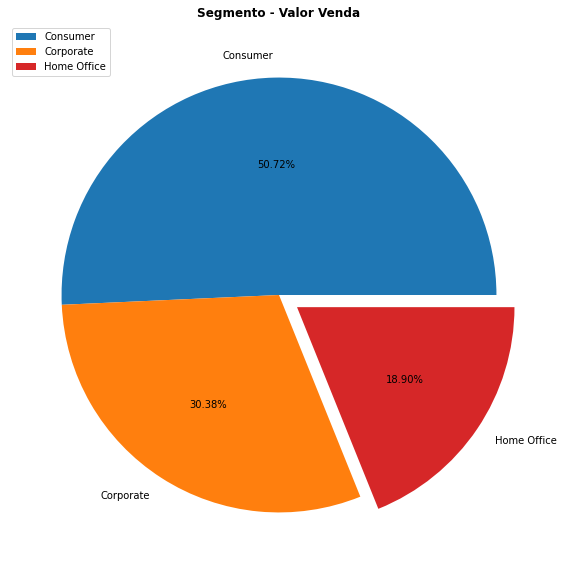

In [50]:
# Com dados simples, o pie plot também deve ser simples, senão pode perder seu valor informativo.
# Por meio das cores ou de um 'explode', pode-se enfatizar alguma variável de interesse, por exemplo.
df_segmento['Percentual'].plot.pie(figsize=(10,10), explode=[0,0,0.1], \
                                   colors=['tab:blue','tab:orange','tab:red'], autopct='%.2f%%')

plt.ylabel('')  # Remover o rótulo do eixo y
plt.title('Segmento - Valor Venda', fontweight='bold')
plt.legend(df_segmento.index, loc='upper left')

plt.show()

## Pergunta de Negócio 6:

### Qual o Total de Vendas Por Segmento e Por Ano?

In [51]:
# Checando o tipo de dados
df_dsa.dtypes

ID_Pedido               object
Data_Pedido     datetime64[ns]
ID_Cliente              object
Segmento                object
Pais                    object
Cidade                  object
Estado                  object
ID_Produto              object
Categoria               object
SubCategoria            object
Valor_Venda            float64
dtype: object

In [52]:
# Criando a coluna "Ano", aplicando filtro e o agrupamento (groupby). 
df_dsa["Ano"] = df_dsa['Data_Pedido'].dt.year
df_dsa[["Segmento","Ano","Valor_Venda"]].groupby(['Segmento', 'Ano']).sum()

Valor_Venda
Segmento    Ano              
Consumer    2015  256719.9166
            2016  265295.2593
            2017  288459.5572
            2018  323359.6019
Corporate   2015  125819.5957
            2016  114643.1229
            2017  203266.7398
            2018  235502.7284
Home Office 2015   88229.0878
            2016   74134.1332
            2017  103639.6270
            2018  156488.5849

## Pergunta de Negócio 7:

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [53]:
# Aplicam-se as regras e os descontos condicionais sobre 'Valor_Venda' para obter os descontos e valores corrigidos:
df_dsa["Descontos"] = df_dsa['Valor_Venda'].apply(lambda x: 0.15 * x if x > 1000 else 0.10 * x)
df_dsa["Valor_Corrigido"] = df_dsa['Valor_Venda'].apply(lambda x: 0.85 * x if x > 1000 else 0.90 * x)
df_dsa.head(15)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Descontos,Valor_Corrigido
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,26.19600,235.76400
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,73.19400,658.74600
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,1.46200,13.15800
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,95.75775,861.81975
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,2.23680,20.13120
5,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,FUR-FU-10001487,Furniture,Furnishings,48.8600,2015,4.88600,43.97400
6,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,OFF-AR-10002833,Office Supplies,Art,7.2800,2015,0.72800,6.55200
7,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,TEC-PH-10002275,Technology,Phones,907.1520,2015,90.71520,816.43680
8,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,OFF-BI-10003910,Office Supplies,Binders,18.5040,2015,1.85040,16.65360
9,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,OFF-AP-10002892,Office Supplies,Appliances,114.9000,2015,11.49000,103.41000


In [54]:
# Calcula-se quantas vendas receberiam 15% de desconto:
# Aplicação de uma máscara booleana [[]] no teste e com o shape contando os valores que satisfazem a condição:
df_dsa[df_dsa['Valor_Venda'] > 1000].shape[0]

457

## Pergunta de Negócio 8:

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [55]:
# Criando um campo com a aplicação somente do desconto de 15%, e outro somente do desconto de 10%:
df_dsa["Valor_Corrigido_15"] = df_dsa['Valor_Venda'].apply(lambda x: 0.85 * x if x > 1000 else x) #15%
df_dsa["Valor_Corrigido_10"] = df_dsa['Valor_Venda'].apply(lambda x: 0.90 * x if x < 1000 else x) #10%
df_dsa.head(10)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Descontos,Valor_Corrigido,Valor_Corrigido_15,Valor_Corrigido_10
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,26.19600,235.76400,261.9600,235.76400
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,73.19400,658.74600,731.9400,658.74600
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,1.46200,13.15800,14.6200,13.15800
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,95.75775,861.81975,957.5775,861.81975
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,2.23680,20.13120,22.3680,20.13120
5,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,FUR-FU-10001487,Furniture,Furnishings,48.8600,2015,4.88600,43.97400,48.8600,43.97400
6,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,OFF-AR-10002833,Office Supplies,Art,7.2800,2015,0.72800,6.55200,7.2800,6.55200
7,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,TEC-PH-10002275,Technology,Phones,907.1520,2015,90.71520,816.43680,907.1520,816.43680
8,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,OFF-BI-10003910,Office Supplies,Binders,18.5040,2015,1.85040,16.65360,18.5040,16.65360
9,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,OFF-AP-10002892,Office Supplies,Appliances,114.9000,2015,11.49000,103.41000,114.9000,103.41000


In [56]:
# Visualmente, já pode-se conferir a diferença entre as médias desejadas pelo cliente:
df_dsa.describe()

,Valor_Venda,Ano,Descontos,Valor_Corrigido,Valor_Corrigido_15,Valor_Corrigido_10
count,9700.000000,9700.000000,9700.000000,9700.000000,9700.000000,9700.000000
mean,230.469892,2016.725773,28.033490,202.436402,215.510390,217.395905
std,627.504252,1.122672,92.670627,535.402727,539.947791,623.911251
min,0.444000,2015.000000,0.044400,0.399600,0.444000,0.399600
25%,17.248000,2016.000000,1.724800,15.523200,17.248000,15.523200
50%,54.272000,2017.000000,5.427200,48.844800,54.272000,48.844800
75%,209.932500,2018.000000,20.993250,188.939250,209.932500,188.939250
max,22638.480000,2018.000000,3395.772000,19242.708000,19242.708000,22638.480000


In [57]:
# Retornando as médias de forma mais amigável:
media_geral = df_dsa["Valor_Venda"].mean().round(2)
media_15 = df_dsa["Valor_Corrigido_15"].mean().round(2)
decremento = (100-(media_15*100/media_geral)).round(2)

print(f"A média de vendas antes da aplicação do desconto: {media_geral}")
print(f"A média de vendas após a aplicação do desconto de 15%: {media_15}")
print(f"A redução percentual no Valor de Vendas é de: {decremento}%")

A média de vendas antes da aplicação do desconto: 230.47
A média de vendas após a aplicação do desconto de 15%: 215.51
A redução percentual no Valor de Vendas é de: 6.49%


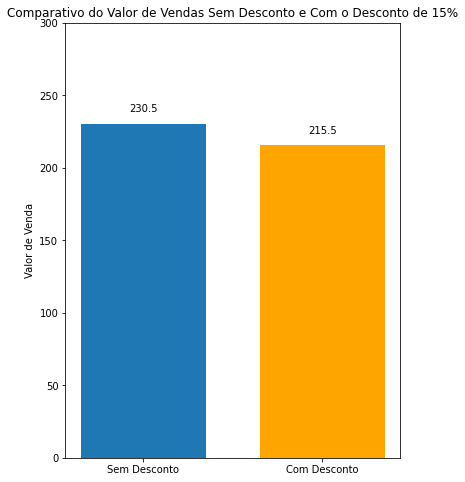

In [58]:
# Pode-se ainda retornar de forma gráfica, se for oportuno, indicando esse decremento do Valor de Venda:
# O plot a seguir, por exemplo, ressalta a proporção do desconto diante do volume total de vendas.
fig, ax = plt.subplots(figsize=(6,8))

sim = ["Sem Desconto", "Com Desconto"]
sells_sim = [media_geral, media_15]
width = 0.7
bar_colors_sim = ['tab:blue', 'orange']

#bars = ax.bar(sim, sells_sim, width = 0.7, color=bar_colors_sim)
bars = ax.bar(np.arange(len(sim)), sells_sim, width, color=bar_colors_sim)

# Adicionando rótulo das barras
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 10),  # offset do texto sobre a barra
                textcoords="offset points", ha='center', va='bottom')

ax.set_ylabel('Valor de Venda')
ax.set_title('Comparativo do Valor de Vendas Sem Desconto e Com o Desconto de 15%')
ax.set_xticks(np.arange(len(sim)))
ax.set_xticklabels(sim)
ax.set_ylim(0, 300)

plt.show()

## Pergunta de Negócio 9:

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês? (Demonstrar o resultado através de gráfico de linha.)

In [59]:
# Cria-se uma coluna referente ao mês: 
df_dsa.insert(12, "Mes", df_dsa['Data_Pedido'].dt.month)

In [60]:
# Cria-se a coluna referente ao Ano+mês:
df_dsa.insert(13, "Ano_Mes", df_dsa['Data_Pedido'].dt.strftime('%Y-%m'))
df_dsa['Ano_Mes'] = pd.to_datetime(df_dsa['Ano_Mes']).dt.to_period("M")
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Mes,Ano_Mes,Descontos,Valor_Corrigido,Valor_Corrigido_15,Valor_Corrigido_10
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,11,2017-11,26.19600,235.76400,261.9600,235.76400
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,11,2017-11,73.19400,658.74600,731.9400,658.74600
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,6,2017-06,1.46200,13.15800,14.6200,13.15800
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,10,2016-10,95.75775,861.81975,957.5775,861.81975
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,10,2016-10,2.23680,20.13120,22.3680,20.13120


In [61]:
# Setando o Pandas para visualizar todas as linhas dos DataFrames criados/filtrados (Opcional).
pd.set_option('display.max_rows', None)

In [62]:
# Agrupam-se então os dados a partir do DF atualizado 'df_dsa' e calcula-se a média de vendas de cada Segmento:
df_segmento_mean = df_dsa[["Segmento","Valor_Venda"]].groupby(['Segmento']).mean()
df_segmento_mean = df_segmento_mean.reset_index() #Criação de índice para facilitar a manipulação
df_segmento_mean

,Segmento,Valor_Venda
0,Consumer,225.011775
1,Corporate,231.819859
2,Home Office,244.073618


In [63]:
# Agrupam-se também os dados para calcular a média de vendas de cada Segmento por Ano.
df_ano_mean = df_dsa[["Segmento","Ano","Valor_Venda"]].groupby(['Segmento', 'Ano']).mean()
df_ano_mean = df_ano_mean.reset_index() #Criação de índice para facilitar a manipulação
df_ano_mean

,Segmento,Ano,Valor_Venda
0,Consumer,2015,250.703044
1,Consumer,2016,239.004738
2,Consumer,2017,223.785537
3,Consumer,2018,200.098764
4,Corporate,2015,211.461505
5,Corporate,2016,191.071872
6,Corporate,2017,263.982779
7,Corporate,2018,244.044278
8,Home Office,2015,292.149297
9,Home Office,2016,221.958483


In [64]:
# Por fim, agrupam-se os dados e calcula-se a média de vendas de cada Segmento por Ano.
df_mes_mean = df_dsa[["Segmento","Ano","Mes","Ano_Mes","Valor_Venda"]].groupby(['Segmento', 'Ano', 'Mes', 'Ano_Mes']).mean()
df_mes_mean = df_mes_mean.reset_index() #Criação de índice para facilitar a manipulação
df_mes_mean

,Segmento,Ano,Mes,Ano_Mes,Valor_Venda
0,Consumer,2015,1,2015-01,146.736787
1,Consumer,2015,2,2015-02,117.327926
2,Consumer,2015,3,2015-03,152.170564
3,Consumer,2015,4,2015-04,189.762750
4,Consumer,2015,5,2015-05,191.337439
5,Consumer,2015,6,2015-06,280.348963
6,Consumer,2015,7,2015-07,275.812286
7,Consumer,2015,8,2015-08,195.232044
8,Consumer,2015,9,2015-09,376.404026
9,Consumer,2015,10,2015-10,228.826718


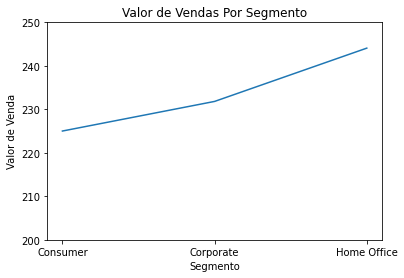

In [65]:
# Plotagem do gráfico de Segmentos.
# Ênfase na diferença entre os três segmentos
fig, ax = plt.subplots()
ax.plot(df_segmento_mean['Segmento'], df_segmento_mean['Valor_Venda'])

ax.set(xlabel='Segmento', ylabel='Valor de Venda', title='Valor de Vendas Por Segmento')
ax.set_ylim(200, 250)

plt.show()

> Plotagem dos Gráficos

Usando o Seaborn para plotar multiplas linhas e representar o resultano anual por segmento.
Para mostrar a relevância das flutuações perante o total, pode-se usar esta representação, onde a representação completa (0 a 300) do eixo y dá uma noção melhor do resultado diante do total. 

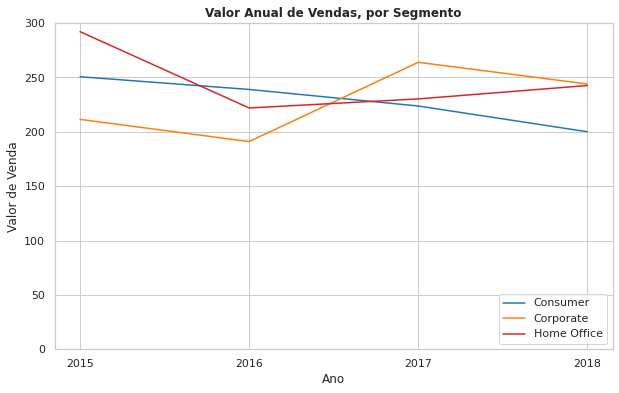

In [66]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6)) 

sns.lineplot(data=df_ano_mean, x='Ano', y='Valor_Venda', hue='Segmento', \
             palette=['tab:blue','tab:orange','tab:red'])

# Ajustando os eixos x e y
plt.yticks(range(0, 301, 50))
plt.xticks(range(2015, 2019, 1))

plt.xlabel('Ano')
plt.ylabel('Valor de Venda')
plt.title('Valor Anual de Vendas, por Segmento', fontweight='bold')
plt.legend(loc='lower right')

plt.show()


Para mostrar em detalhe, pode-se usar esta representação, limitando o eixo y somente para o intervalo de ocorrências.

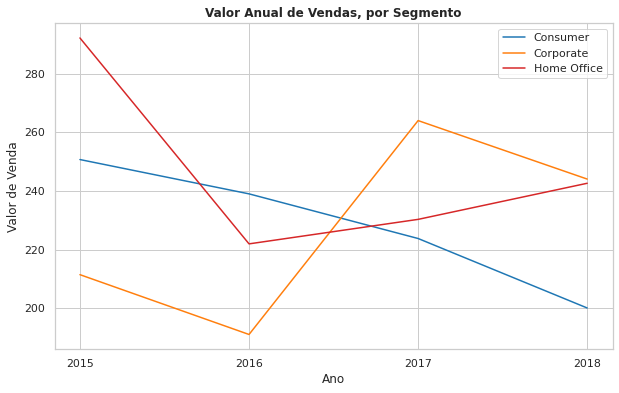

In [67]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6)) 

sns.lineplot(data=df_ano_mean, x='Ano', y='Valor_Venda', hue='Segmento', \
             palette=['tab:blue','tab:orange','tab:red'])

# Ajustando somente o eixo x
plt.xticks(range(2015, 2019, 1))

plt.xlabel('Ano')
plt.ylabel('Valor de Venda')
plt.title('Valor Anual de Vendas, por Segmento', fontweight='bold')
plt.legend(loc='upper right')

plt.show()

A abordagem a seguir utiliza-se do dataframe com agrupamento mensal para representar as médias anuais, porém, indicando também a variação (máx e mín) mensal do Valor de Venda para Segmento e em cada ano, destacados pela área sombreada.

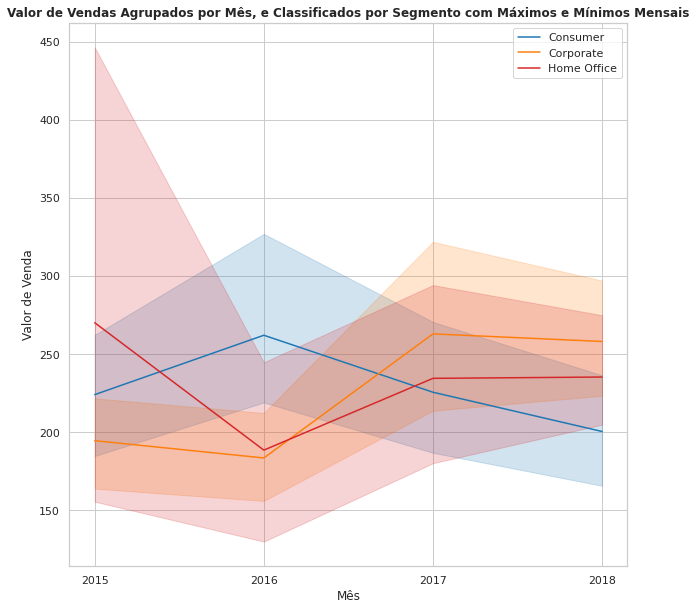

In [68]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 10)) 

sns.lineplot(data=df_mes_mean, x='Ano', y='Valor_Venda', hue='Segmento', \
             palette=['tab:blue','tab:orange','tab:red'])

# Ajustando os eixos x e y
plt.xticks(range(2015, 2019, 1))

plt.xlabel('Mês')
plt.ylabel('Valor de Venda')
plt.title('Valor de Vendas Agrupados por Mês, e Classificados por Segmento com Máximos e Mínimos Mensais', fontweight='bold')
plt.legend(loc='upper right')

plt.show()

O mesmo pode ser feito para o agrupamento mensal dos resultados.
Neste caso, temos também mais de uma abordagem.

Esta primeira abordagem agrupa os resultados por mês (Janeiro a Dezembro), sem distinção de ano, com o objetivo de representar os meses com maior e menor volume de vendas para cada segmento.

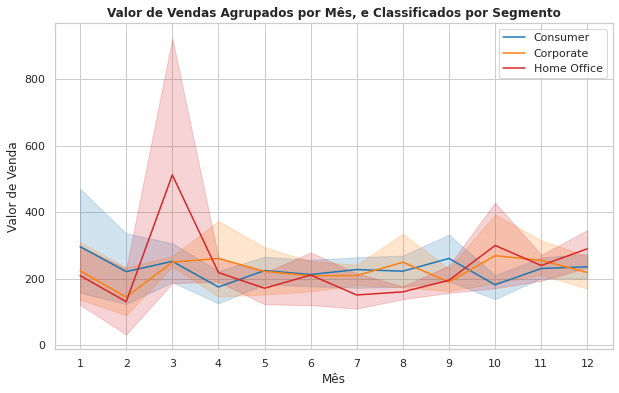

In [69]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6)) 

sns.lineplot(data=df_mes_mean, x='Mes', y='Valor_Venda', hue='Segmento', \
             palette=['tab:blue','tab:orange','tab:red'])

# Ajustando os eixos x e y
plt.xticks(range(1, 13, 1))

plt.xlabel('Mês')
plt.ylabel('Valor de Venda')
plt.title('Valor de Vendas Agrupados por Mês, e Classificados por Segmento', fontweight='bold')
plt.legend(loc='upper right')

plt.show()

Esta segunda abordagem representa os dados mensais em uma série temporal, de Janeiro de 2015 a Dezembro de 2018.

In [70]:
# Corrigindo o dtype da coluna 'Ano-Mes' para permitir a plotagem correta do gráfico:
df_mes_mean['Ano_Mes'] = df_mes_mean['Ano_Mes'].dt.to_timestamp()
df_mes_mean['Ano_Mes'] = df_mes_mean['Ano_Mes'].dt.strftime('%Y-%m')

Não é um gráfico tão proveitoso quando o anterior, mas pode indicar algumas tendências, como a provável ocorrência de um outlier no Segmento 'Home Office', por exemplo, já previamente rastreada no início deste notebook:

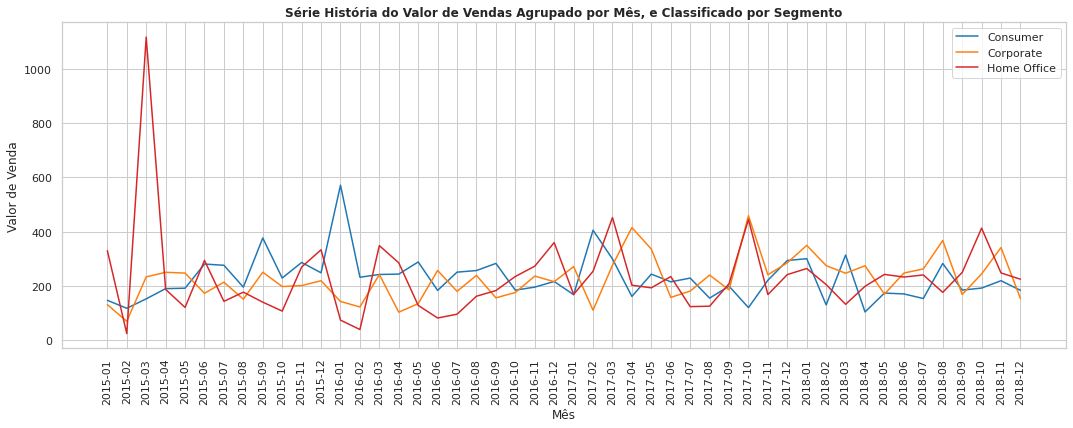

In [71]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(18, 6)) 

sns.lineplot(data=df_mes_mean, x='Ano_Mes', y='Valor_Venda', hue='Segmento', \
             palette=['tab:blue','tab:orange','tab:red'])

plt.xlabel('Mês')
plt.xticks(rotation='vertical')
plt.ylabel('Valor de Venda')
plt.title('Série História do Valor de Vendas Agrupado por Mês, e Classificado por Segmento', fontweight='bold')
plt.legend(loc='upper right')

plt.show()

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? (Demonstrar tudo através de um único gráfico.)

In [72]:
# Aplicação de um groupby sobre as features de interesse para compor o plot: 
df_categoria = df_dsa[["Categoria","SubCategoria","Valor_Venda"]].groupby(['Categoria', 'SubCategoria']).sum()
df_categoria

Valor_Venda
Categoria       SubCategoria             
Furniture       Bookcases     108045.0467
                Chairs        317919.6250
                Furnishings    88862.7700
                Tables        202083.3600
Office Supplies Appliances    104061.6930
                Art            26573.7360
                Binders       194723.3810
                Envelopes      15791.1820
                Fasteners       3001.9600
                Labels         12267.3660
                Paper          76312.7640
                Storage       216188.3620
                Supplies       46177.3280
Technology      Accessories   162791.3620
                Copiers       146248.0940
                Machines      189238.6310
                Phones        325271.2940

Como não há subcategorias recorrentes (que ocorrem em mais de uma categoria), pode-se ordenar o DataFrame diretamente pelo maior valor de venda:

In [73]:
df_categoria = df_categoria.sort_values(by='Valor_Venda', ascending=False)
df_categoria = df_categoria.reset_index()
df_categoria

,Categoria,SubCategoria,Valor_Venda
0,Technology,Phones,325271.2940
1,Furniture,Chairs,317919.6250
2,Office Supplies,Storage,216188.3620
3,Furniture,Tables,202083.3600
4,Office Supplies,Binders,194723.3810
5,Technology,Machines,189238.6310
6,Technology,Accessories,162791.3620
7,Technology,Copiers,146248.0940
8,Furniture,Bookcases,108045.0467
9,Office Supplies,Appliances,104061.6930


E finalmente, para o último plot, pode-se plotar os valores de forma ordenada, classificando as barras por cores correspondentes a cada categoria, e trazendo as Subcategorias dentro do eixo Y, obtendo-se o resultado desejado:

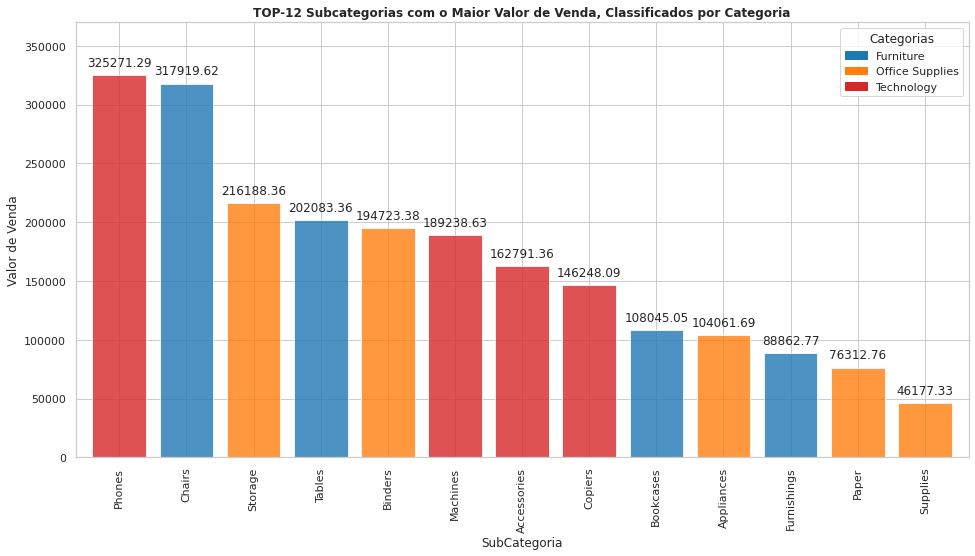

In [75]:
fig, ax = plt.subplots(figsize=(16, 8))

category_colors = {
    'Furniture': 'tab:blue',
    'Office Supplies': 'tab:orange',
    'Technology': 'tab:red'
}

df_categoria[0:13].plot.bar(ax=ax, x='SubCategoria', y='Valor_Venda', \
                            color=df_categoria['Categoria'].map(category_colors), width=0.8, alpha=0.8)

ax.set_xlabel('SubCategoria')
ax.set_ylabel('Valor de Venda')
ax.set_ylim(0, 370000)
ax.set_title('TOP-12 Subcategorias com o Maior Valor de Venda, Classificados por Categoria', fontweight='bold')

for p in ax.patches:
    bar_label = '{:.2f}'.format(round(p.get_height(),2))
    ax.annotate(str(bar_label), (p.get_x() + p.get_width() / 2, p.get_height()), \
                xytext=(0, 6), textcoords="offset points",\
                ha='center', va='bottom')
    
# Create custom legend handles
legend_handles = [
    mpatches.Patch(color=color, label=categoria)
    for categoria, color in category_colors.items()
]

# Create the legend with custom handles
ax.legend(title='Categorias', handles=legend_handles, loc='best')
    
plt.show()

# Fim